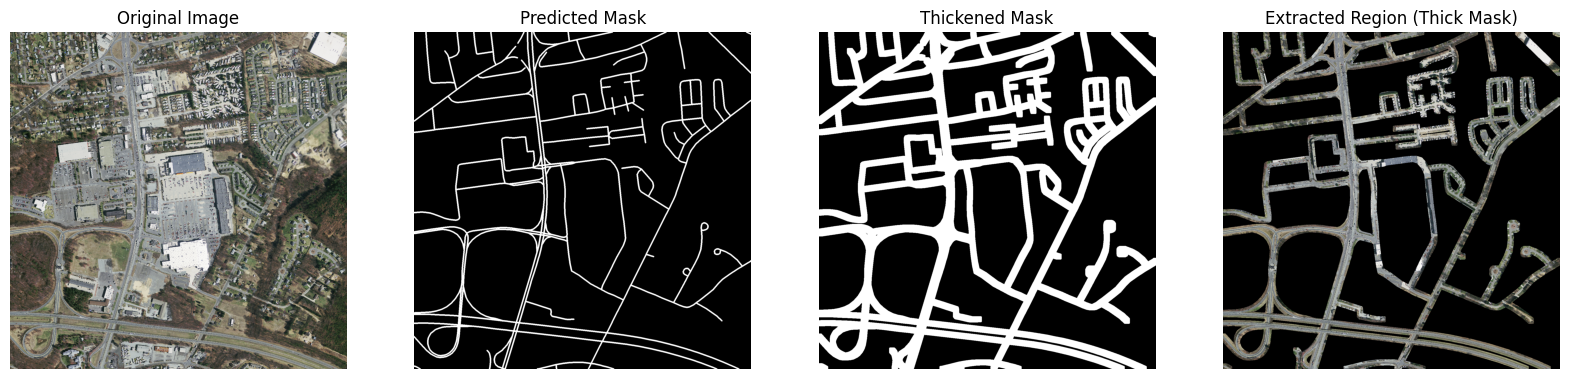

In [1]:
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image

# Define paths for sample image and mask
image_path = "data/train/11128810_15.tiff"
mask_path = "data/train_labels/11128810_15.tif"

# Load the image and mask
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)  # Load mask in grayscale

# Normalize mask to binary (assuming non-zero values indicate mask region)
mask_binary = (mask > 0).astype(np.uint8)

# Morphological dilation to thicken the lines
kernel_size = (5, 5)  # You can adjust this size
kernel = np.ones(kernel_size, np.uint8)
iterations = 5       # Increase if you want thicker lines
mask_thick = cv2.dilate(mask_binary, kernel, iterations=iterations)

# Extract overlapping region using the thickened mask
extracted_region = cv2.bitwise_and(image, image, mask=mask_thick)

# Display original image, original mask, thickened mask, and final extracted region
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

axes[0].imshow(image)
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(mask, cmap="gray")
axes[1].set_title("Predicted Mask")
axes[1].axis("off")

axes[2].imshow(mask_thick, cmap="gray")
axes[2].set_title("Thickened Mask")
axes[2].axis("off")

axes[3].imshow(extracted_region)
axes[3].set_title("Extracted Region (Thick Mask)")
axes[3].axis("off")

plt.show()


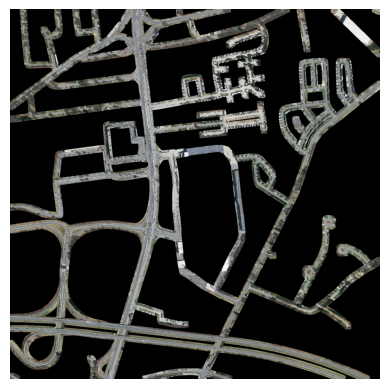

In [10]:
plt.axis("off")
plt.imshow(extracted_region)
plt.savefig("ex.jpg")
plt.show()

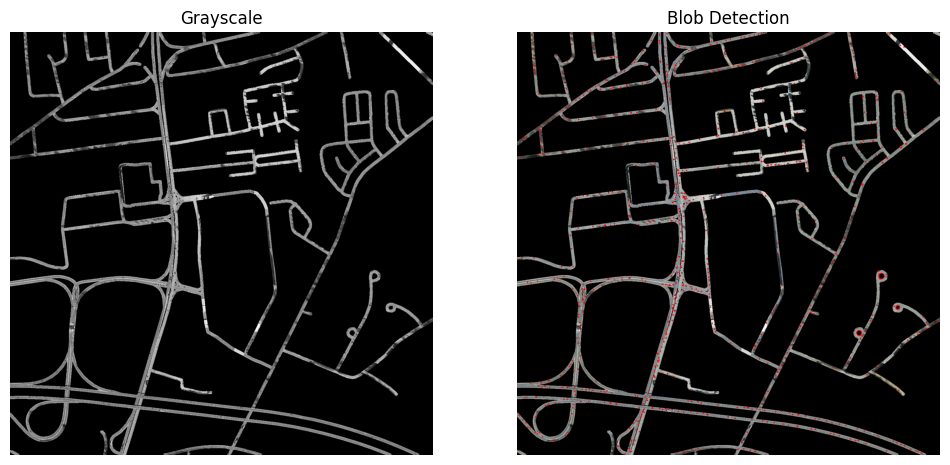

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Convert to grayscale
gray = cv2.cvtColor(extracted_region, cv2.COLOR_RGB2GRAY)

# Set up the SimpleBlobDetector parameters.
params = cv2.SimpleBlobDetector_Params()
params.filterByArea = True
params.minArea = 5   # Tune this
params.maxArea = 500 # Tune this

# You can also enable other filters:
# params.filterByCircularity = True
# params.minCircularity = 0.3

detector = cv2.SimpleBlobDetector_create(params)

# Detect blobs
keypoints = detector.detect(gray)

# Draw detected blobs as red circles
output = extracted_region.copy()
for kp in keypoints:
    x, y = int(kp.pt[0]), int(kp.pt[1])
    r = int(kp.size / 2)
    cv2.circle(output, (x, y), r, (255, 0, 0), 2)

# Show results
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(gray, cmap='gray')
axes[0].set_title("Grayscale")
axes[0].axis("off")

axes[1].imshow(output)
axes[1].set_title("Blob Detection")
axes[1].axis("off")

plt.show()
